<a href="https://colab.research.google.com/github/prateekbps/DataScience/blob/main/CAT_%26_Dog_classification_CNN_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:06<00:00, 158MB/s]
100% 1.06G/1.06G [00:06<00:00, 174MB/s]


In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_file.extractall('/content')
zip_file.close()

In [4]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.models import Sequential


In [5]:
# Generating the dataset and inferring & encoding the labels
train_ds = keras.utils.image_dataset_from_directory(directory='/content/train', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(227,227))
test_ds = keras.utils.image_dataset_from_directory(directory='/content/test', labels='inferred',
                                                    label_mode='int', batch_size=32,
                                                    image_size=(227,227))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize the data
def process(image, label):
  image = tf.cast(image/255.0, tf.float64)
  return image, label

In [7]:
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
folder_path_train = '/content/train'
folder_path_test = '/content/test'

In [24]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=25, width_shift_range=0.2, height_shift_range=0.3,
                                   zoom_range=0.3,horizontal_flip=True)

In [25]:
# apply data augmentation method to my original dataset
# Create the training generator using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    folder_path_train,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

Found 20000 images belonging to 2 classes.


In [28]:
# apply data augmentation method to my original dataset
# Create the training generator using flow_from_directory
test_generator = train_datagen.flow_from_directory(
    folder_path_test,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

Found 5000 images belonging to 2 classes.


In [29]:
# modify architecture
# CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=2,padding='same', activation='relu', input_shape=(227,227,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Conv2D(32, kernel_size=(3,3), strides=2,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# flatten
model.add(Flatten())
# DNN 1
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# output
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fit the model
history = model.fit(train_generator, batch_size=128,epochs=5, validation_data=test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
622/625 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 0.6244 - loss: 0.7016

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 304s 476ms/step - accuracy: 0.6246 - loss: 0.7012 - val_accuracy: 0.6038 - val_loss: 0.6955
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 474ms/step - accuracy: 0.7029 - loss: 0.5728 - val_accuracy: 0.6828 - val_loss: 0.5972
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 475ms/step - accuracy: 0.7155 - loss: 0.5489 - val_accuracy: 0.7146 - val_loss: 0.5553
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 321s 474ms/step - accuracy: 0.7294 - loss: 0.5331 - val_accuracy: 0.6150 - val_loss: 0.8227
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 321s 472ms/step - accuracy: 0.7416 - loss: 0.5239 - val_accuracy: 0.6970 - val_loss: 0.5960


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
cat_image= cv2.imread('/content/cat.jpg')
dog_image = cv2.imread('/content/dog.jpg')

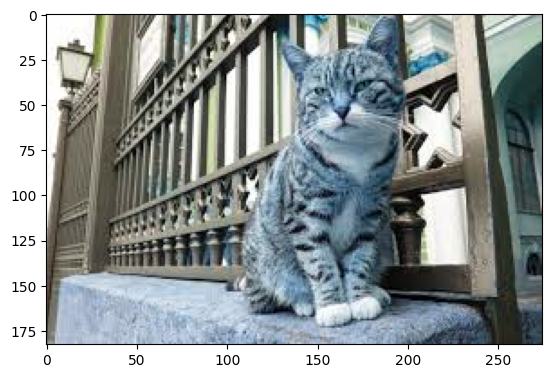

In [34]:
plt.imshow(cat_image)

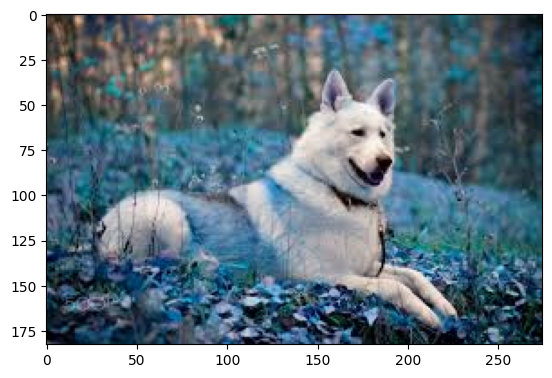

In [35]:
plt.imshow(dog_image)

In [36]:
cat_image.shape

(183, 275, 3)

In [37]:
cat = cv2.resize(cat_image, (227,227))

In [38]:
cat.shape

(227, 227, 3)

In [39]:
cat_input = cat.reshape((1,227,227,3))

In [40]:
cat_input.shape

(1, 227, 227, 3)

In [41]:
model.predict(cat_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


array([[0.]], dtype=float32)

In [43]:
dog_image.shape

(183, 275, 3)

In [44]:
dog= cv2.resize(dog_image, (227,227))

In [45]:
dog.shape

(227, 227, 3)

In [46]:
dog_input = dog.reshape((1,227,227,3))

In [47]:
model.predict(dog_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[1.]], dtype=float32)

In [50]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model.save('/content/cat&dog.h5')